<a href="https://colab.research.google.com/github/p132588/p132588_liyutong/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appstore Data Analytics**
# **Project Description**
The goal of this project is to analyze the 'applestore.csv' dataset. By delving into the downloads and ratings data of software in the Appstore, we hope to find the following information:

1. what are the main categories of free and paid apps in the Appstore

2. the price distribution of paid apps

3. Whether there is a correlation between app size, price, and user ratings.

# **Analysis process**

1 Data Profile Analysis

In this section, I will do a preliminary exploration of the dataset, including data missing values, outlier situations, etc.

2 Variable Analysis

Detailed analysis of each variable in the dataset, including but not limited to the distribution of variables, the relationship between variables, etc.

3 Visualization

In this section, I will visualize the results we get in variable analysis through graphs and charts to better understand the data and analyze the results.

# **Recommendations and Conclusions**

In this section, we will summarize the results of our analysis and make some possible recommendations or improvements based on the results.

# **Analysis process**

## **Data Profile Analysis**

In [ ]:
# Import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load data to see the basics of the data
app=pd.read_csv('/content/applestore.csv',index_col=0)#Specify the first column as a row label
app.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45


In [ ]:
#View information about each column and whether there are any missing values in each column
app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7197 entries, 0 to 7196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   user_rating       7197 non-null   float64
 6   prime_genre       7197 non-null   object 
 7   sup_devices       7197 non-null   int64  
 8   ipadSc_urls       7197 non-null   int64  
 9   lang              7197 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 618.5+ KB


**By looking at the information in each column, it is known that the dataset has the following 9 variables:**

id : app ID is the unique identifier of each APP

track_name : the name of the APP

size_bytes : the size of the APP in bytes

price ： pricing in USD

rating_count_tot : the number of user ratings for all versions of the App

rating_count_ver ： The number of user ratings of the current version of the App.

prime_genre ： App's category

user_rating ： User rating of all versions of the App

sup_devices.num ： Number of supported IOS devices

ipadSc_urls.num ： The number of screenshots provided by the app.

lang.num ： Number of supported languages

In [ ]:
#Viewing for missing values
app.shape

(7197, 10)

This result shows that the dataset has a total of 7,197 columns of data, and combined with the info() result, we can tell that the dataset is complete and has no missing values

In [ ]:
##View descriptive metrics for the dataset
app.describe()

,id,size_bytes,price,rating_count_tot,user_rating,sup_devices,ipadSc_urls,lang
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,37.361817,3.707100,5.434903
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,3.737715,1.986005,7.919593
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,9.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,37.000000,3.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,37.000000,5.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,38.000000,5.000000,8.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,47.000000,5.000000,75.000000


From the table above, it can be observed that the mean value of App user ratings is 3.526956, which combined with the quartiles shows that most of the software ratings are above 3.5

From the price column it can be seen that more than half of the apps are free of charge

In [ ]:
# Handle the app size
#To facilitate subsequent processing, award sizebytes to mb
app['size_mb']=app['size_bytes']/(1024*1024)
app.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562


In [ ]:
app['size_mb'].describe()

count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_mb, dtype: float64

## **Variable Analysis**

### **Analyzing the distribution of prices**

In [ ]:
# Add a paid column if free or not based on price
app['paid']=app['price'].apply(lambda x:1 if x>0 else 0)
app

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,0.00,142,4.5,Games,38,5,1,120.777344,0
7193,1187682390,VR Roller-Coaster,120760320,0.00,30,4.5,Games,38,0,1,115.166016,0
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,1.99,15,4.5,Utilities,37,1,1,106.165039,1
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,0.00,85,4.5,Games,38,0,2,92.731445,0


In [ ]:
app['paid'].value_counts()

paid
0    4056
1    3141
Name: count, dtype: int64

That means there are 4056 that are free and 3141 that are charged.

In [ ]:
#View the overall distribution of APP prices
app.price.value_counts()

price
0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
29.99        6
13.99        6
11.99        6
12.99        5
15.99        4
17.99        3
59.99        3
39.99        2
20.99        2
23.99        2
49.99        2
22.99        2
27.99        2
16.99        2
299.99       1
21.99        1
47.99        1
99.99        1
74.99        1
34.99        1
18.99        1
249.99       1
Name: count, dtype: int64

According to the table above, it is found that the pricing of apps is not high, the vast majority of apps are free, and overall the price range of apps is in the range of [0,250], and is mainly concentrated in the [0,10] price range

In [ ]:
#Grouped by Price Award APP data
bins=[0,2,10,30]
labels=['<2','<10','<30']
app['price_new']=pd.cut(app.price,bins=bins,right=False,labels=labels)
app.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid,price_new
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1,<10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0,<2
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0,<2
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0,<2
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0,<2


In [ ]:
#View APP price distribution by zone
app.groupby('price_new').price.describe()

,count,mean,std,min,25%,50%,75%,max
price_new,,,,,,,,
<2,5405.0,0.361981,0.675318,0.00,0.00,0.00,0.00,1.99
<10,1695.0,4.565811,1.864034,2.99,2.99,3.99,4.99,9.99
<30,84.0,18.573333,5.241650,11.99,14.99,16.49,21.24,29.99


In [ ]:
#View how different listings app prices are distributed
app.groupby('prime_genre').price.describe()

,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,112.0,1.790536,3.342210,0.0,0.0,0.00,2.99,27.99
Business,57.0,5.116316,10.247031,0.0,0.0,2.99,4.99,59.99
Catalogs,10.0,0.799000,2.526660,0.0,0.0,0.00,0.00,7.99
Education,453.0,4.028234,18.725946,0.0,0.0,2.99,2.99,299.99
Entertainment,535.0,0.889701,1.454022,0.0,0.0,0.00,1.99,9.99
Finance,104.0,0.421154,1.108990,0.0,0.0,0.00,0.00,5.99
Food & Drink,63.0,1.552381,3.972119,0.0,0.0,0.00,1.49,27.99
Games,3862.0,1.432923,2.486609,0.0,0.0,0.00,1.99,29.99
Health & Fitness,180.0,1.916444,2.052378,0.0,0.0,1.99,2.99,9.99


In [ ]:
#Delete higher priced data as there is very little data greater than 50 or more
app=app[app['price']<49.99]
app.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid,price_new
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1,<10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0,<2
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0,<2
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0,<2
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0,<2


<ipython-input-16-6845781e08b1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(app_result['price'])


<Axes: xlabel='price', ylabel='Density'>

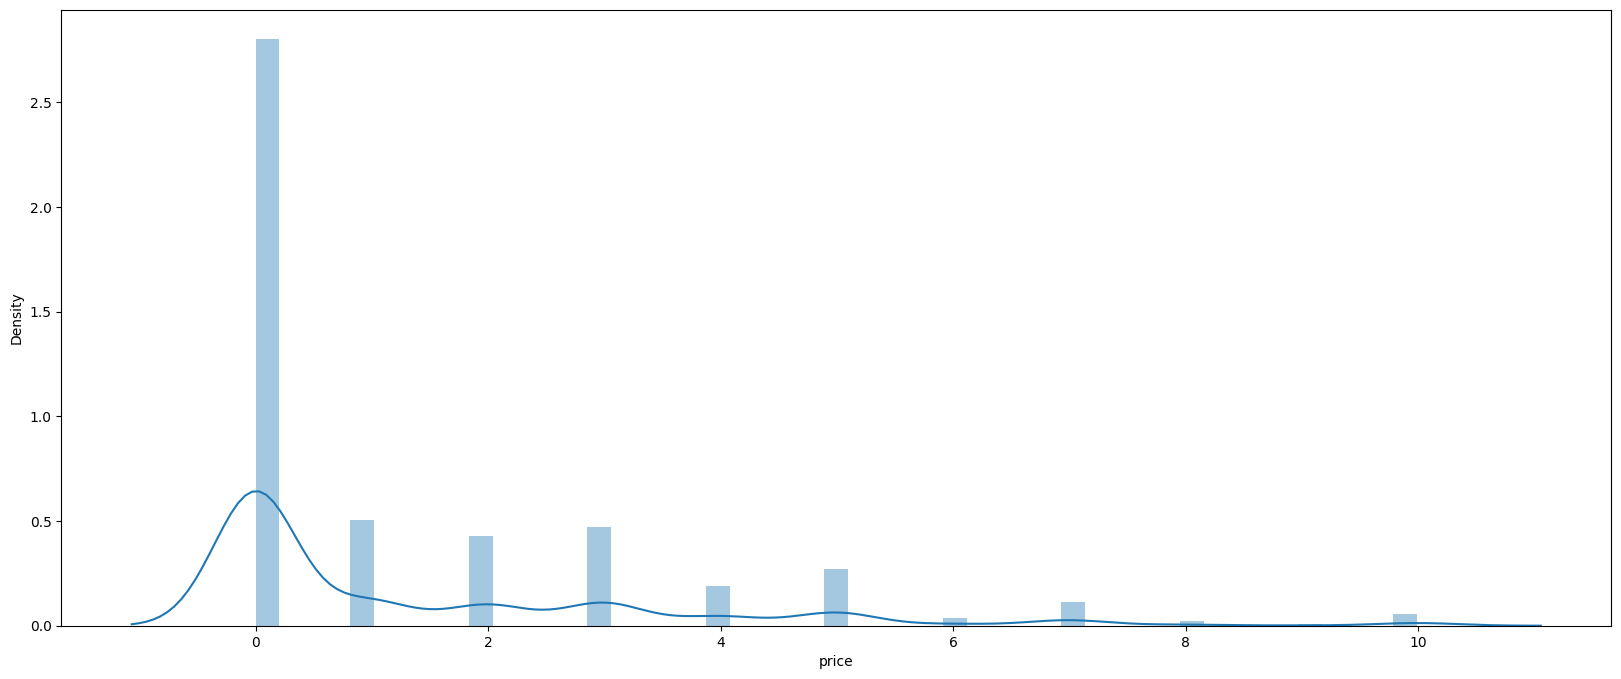

In [ ]:
#View price distribution of apps priced less than or equal to $9.99
plt.figure(figsize=(20,8))
app_result=app[app['price']<=9.99]
sns.distplot(app_result['price'])

from the graph:

1. the density of apps with a price of 0 is the highest, exceeding 2.5, which indicates that most of the apps are free.

2. the density of apps decreases as the price increases, which indicates that the number of apps with higher prices is relatively small.

In [ ]:
app['prime_genre'].value_counts().index

Index(['Games', 'Entertainment', 'Education', 'Photo & Video', 'Utilities',
       'Health & Fitness', 'Productivity', 'Social Networking', 'Lifestyle',
       'Music', 'Shopping', 'Sports', 'Book', 'Finance', 'Travel', 'News',
       'Weather', 'Reference', 'Food & Drink', 'Business', 'Navigation',
       'Medical', 'Catalogs'],
      dtype='object', name='prime_genre')

<Axes: xlabel='count', ylabel='prime_genre'>

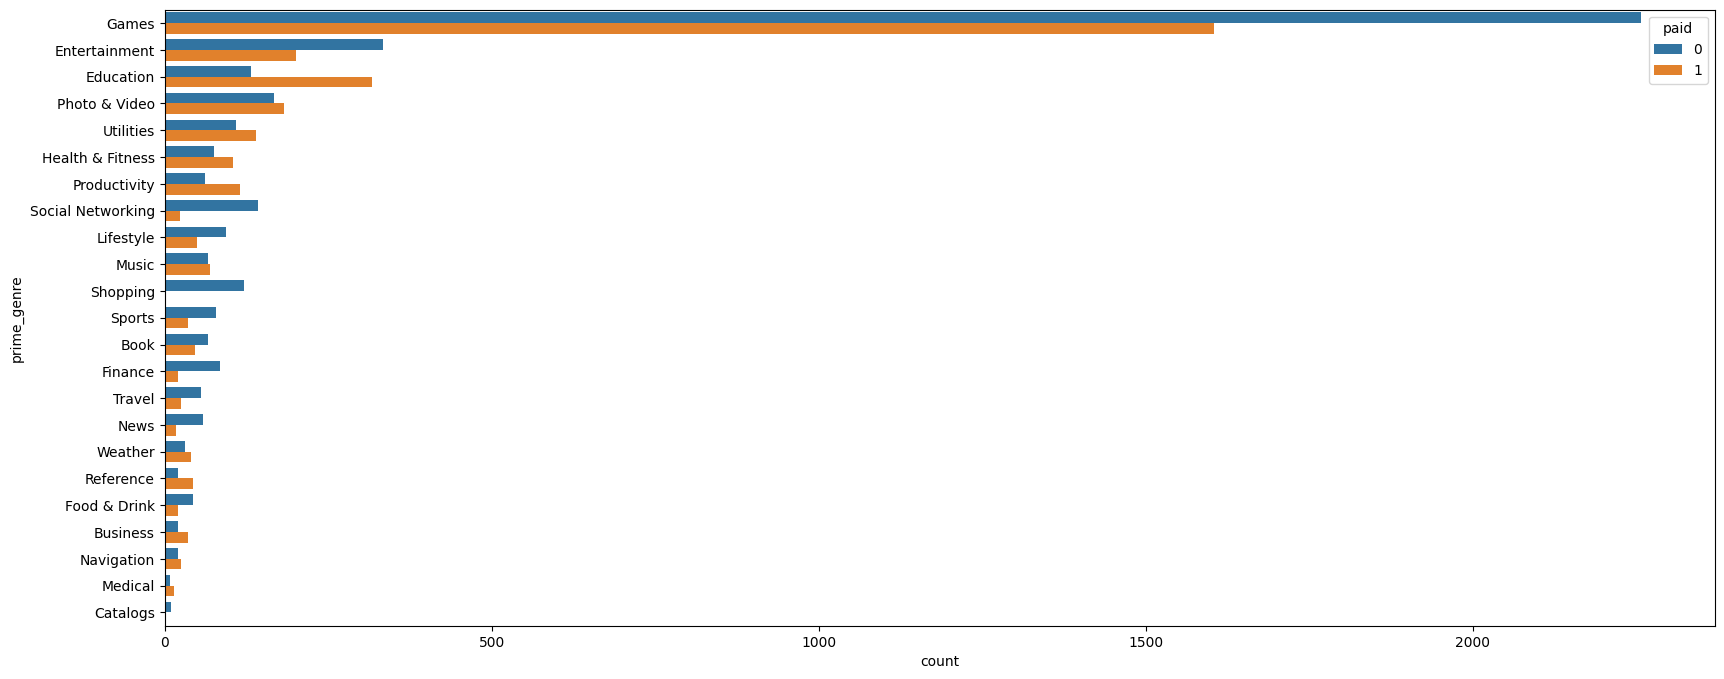

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(y='prime_genre',data=app,
              order=app['prime_genre'].value_counts().index,hue='paid')

As we can see from the graph:

The Games category has the highest number of apps, both paid and free apps.
For most of the app categories, there are more free apps than paid apps.

Some categories (e.g., medical, catalogs) have a relatively small number of apps.

<Axes: xlabel='price', ylabel='prime_genre'>

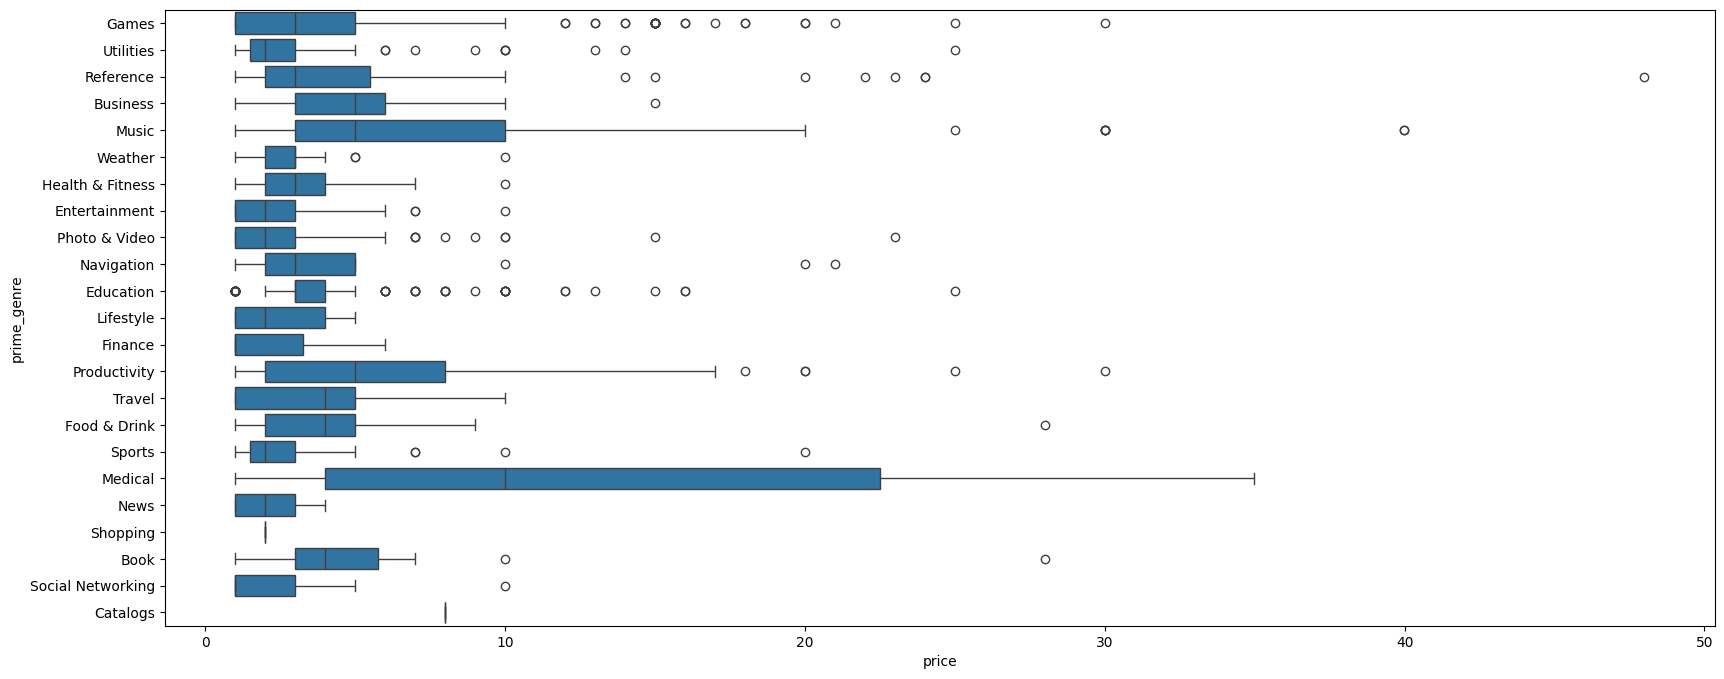

In [ ]:
#View the price distribution of paid apps in different categories
plt.figure(figsize=(20,8))
sns.boxplot(x='price',y='prime_genre',data=app[app['paid']==1])

The higher median price for medical apps indicates that apps in this category usually require a fee and pay the highest amount.

In [ ]:
#View the price distribution of the top 5 categories with the highest number of paid APPs
#Sift through the data of the top 5 categories of APPs with the highest number of charges
top5=app.groupby('prime_genre')['price'].count().sort_values(ascending=False).head()
top5

prime_genre
Games            3862
Entertainment     535
Education         449
Photo & Video     349
Utilities         248
Name: price, dtype: int64

In [ ]:
app5=app[app.prime_genre.isin(top5.index)]

<Axes: xlabel='price', ylabel='prime_genre'>

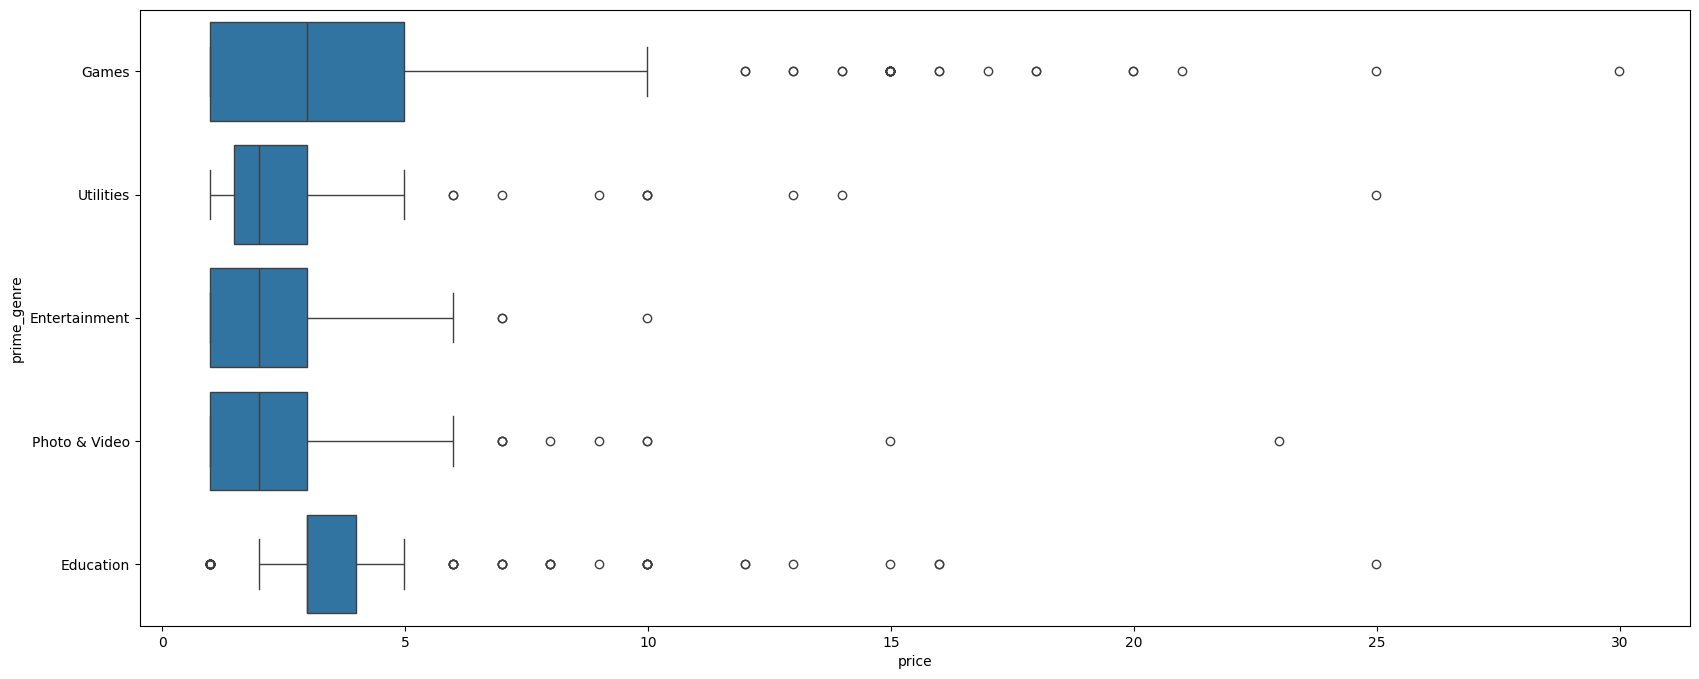

In [ ]:
# Plotting box lines
plt.figure(figsize=(20,8))
sns.boxplot(x='price',y='prime_genre',data=app5[app5['paid']==1])

The outliers for game applications are more numerous and more widely distributed, indicating that there is a large price gap between different games

### **Analyze whether there is a correlation between app size and price and user ratings**

In [ ]:
#Compare free and paid ratings in the same category
plt.figure(figsize=(20,8))
sns.barplot(x='prime_genre',y='user_rating',data=app5,hue='paid')

In [ ]:
#View stats on the number of ratings for all versions of apps
app.rating_count_tot.describe()

count    7.188000e+03
mean     1.290867e+04
std      7.578550e+04
min      0.000000e+00
25%      2.700000e+01
50%      3.010000e+02
75%      2.798000e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64

In [ ]:
#Grouping intervals on the number of app ratings
bins=[0,1000,5000,100000,5000000]
app['rating_new']=pd.cut(app['rating_count_tot'],bins,right=False)
app.head()

<ipython-input-24-61fcb3df9120>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['rating_new']=pd.cut(app['rating_count_tot'],bins,right=False)


,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid,price_new,rating_new
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1,<10,"[5000, 100000)"
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0,<2,"[100000, 5000000)"
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0,<2,"[100000, 5000000)"
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0,<2,"[100000, 5000000)"
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0,<2,"[100000, 5000000)"


In [ ]:
app.groupby('rating_new').price.describe()

,count,mean,std,min,25%,50%,75%,max
rating_new,,,,,,,,
"[0, 1000)",4585.0,1.777675,3.169326,0.0,0.0,0.0,2.99,47.99
"[1000, 5000)",1193.0,1.740721,3.203853,0.0,0.0,0.0,2.99,39.99
"[5000, 100000)",1192.0,0.963549,1.984895,0.0,0.0,0.0,0.99,14.99
"[100000, 5000000)",218.0,0.196376,0.925160,0.0,0.0,0.0,0.00,7.99


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Games'),
  Text(1, 0, 'Productivity'),
  Text(2, 0, 'Weather'),
  Text(3, 0, 'Shopping'),
  Text(4, 0, 'Reference'),
  Text(5, 0, 'Finance'),
  Text(6, 0, 'Music'),
  Text(7, 0, 'Utilities'),
  Text(8, 0, 'Travel'),
  Text(9, 0, 'Social Networking'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Business'),
  Text(12, 0, 'Health & Fitness'),
  Text(13, 0, 'Entertainment'),
  Text(14, 0, 'Photo & Video'),
  Text(15, 0, 'Navigation'),
  Text(16, 0, 'Education'),
  Text(17, 0, 'Lifestyle'),
  Text(18, 0, 'Food & Drink'),
  Text(19, 0, 'News'),
  Text(20, 0, 'Book'),
  Text(21, 0, 'Medical'),
  Text(22, 0, 'Catalogs')])

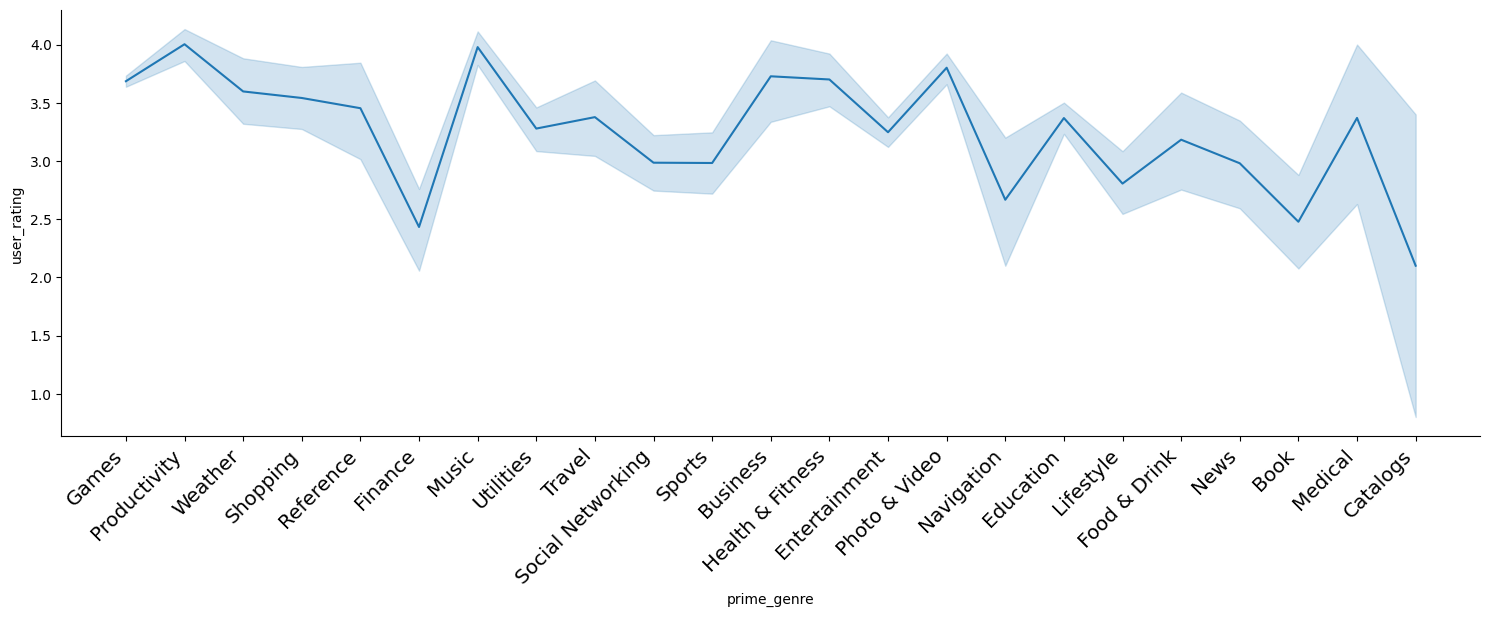

In [ ]:
#View the relationship between app categories and ratings, plotting line graphs
sns.relplot(x='prime_genre',y='user_rating',kind='line',data=app,
            height=5,aspect=3)
plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight='light',
           fontsize='x-large'
          )

This line graph represents the user ratings of different categories of apps and it can be seen that productivity,music and business have higher ratings, while finance, navigation,book have lower ratings

<Axes: xlabel='price', ylabel='user_rating'>

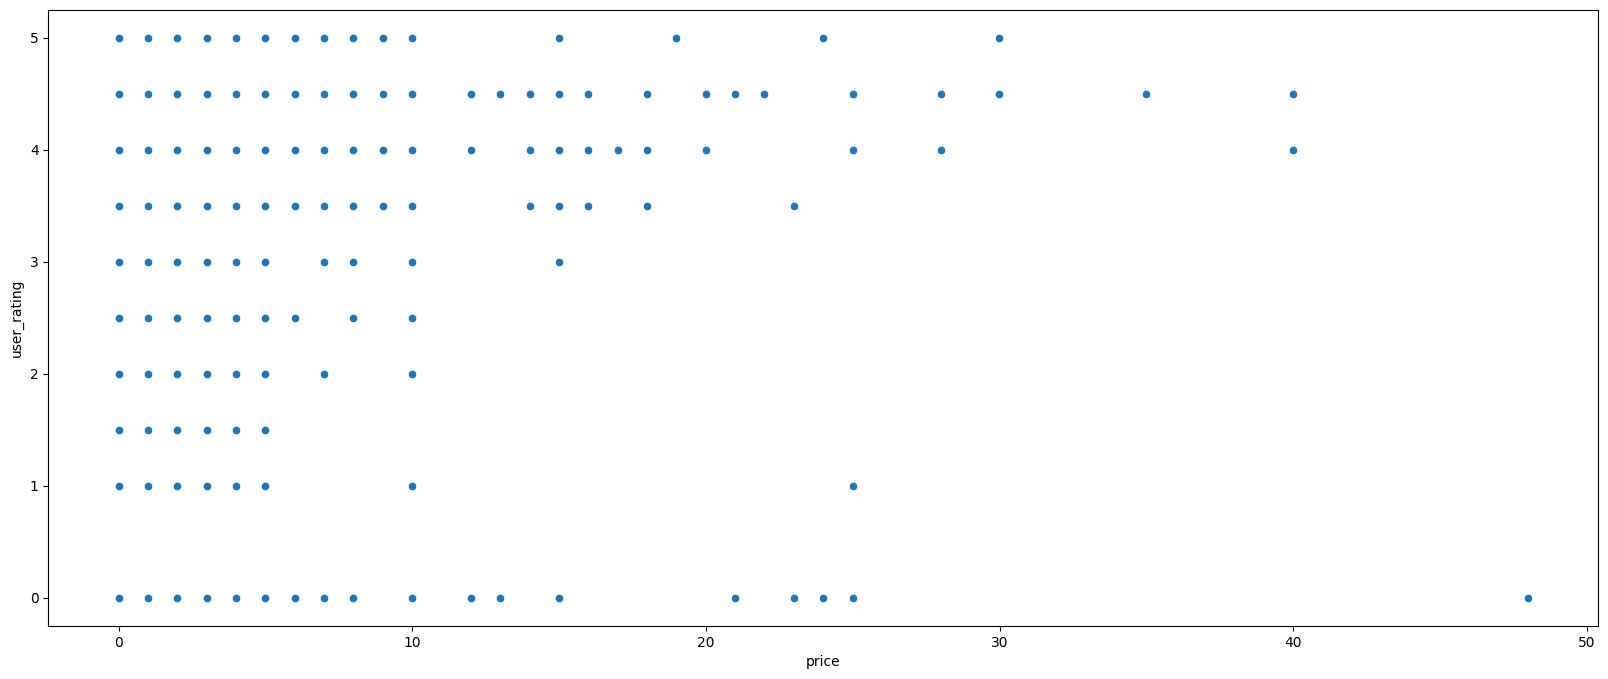

In [ ]:
#View the relationship between app prices and user ratings, plotting scatterplots
plt.figure(figsize=(20,8))
sns.scatterplot(x='price',y='user_rating',data=app)

It's impossible to tell the relationship between price and comments in the chart above

<Axes: xlabel='prime_genre', ylabel='user_rating'>

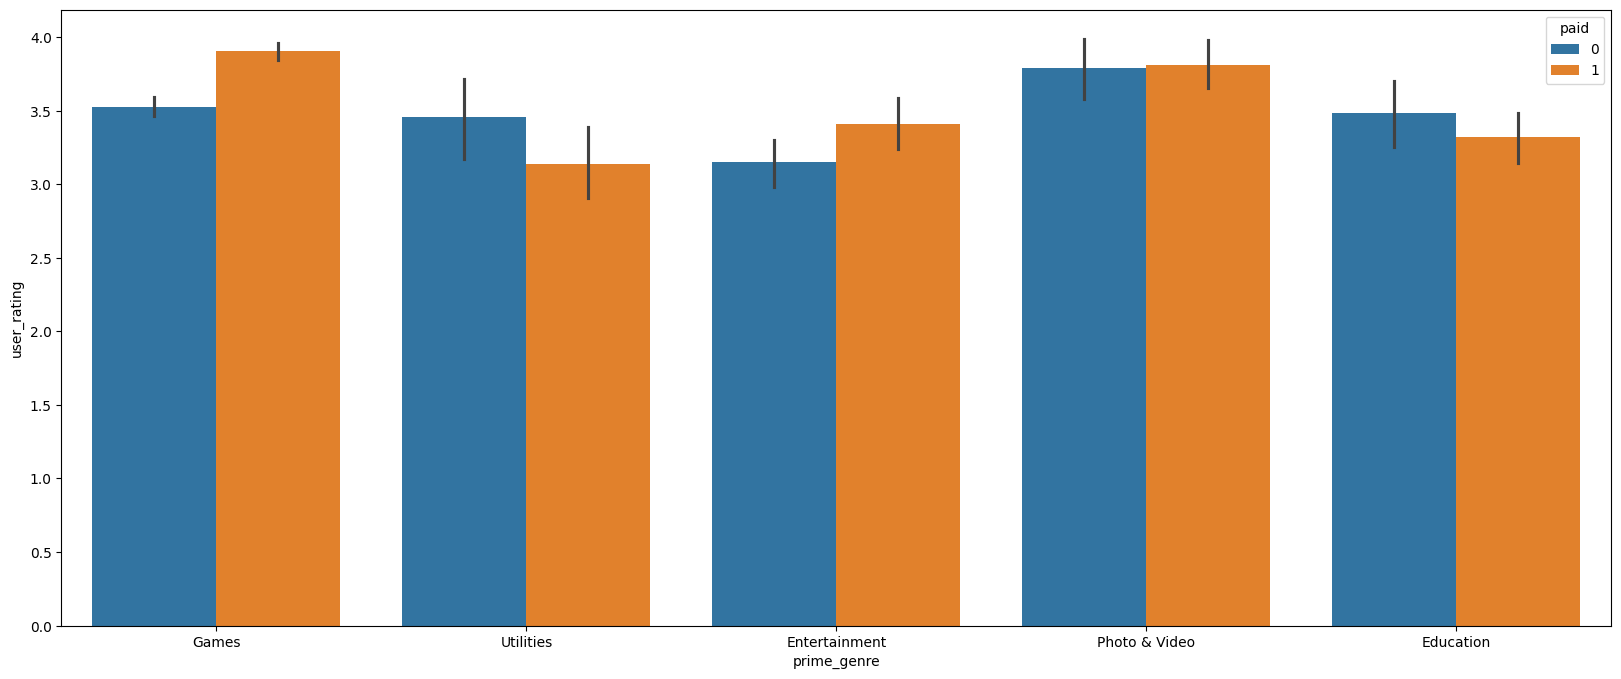

In [ ]:
#Compare free and paid ratings in the same category
plt.figure(figsize=(20,8))
sns.barplot(x='prime_genre',y='user_rating',data=app5,hue='paid')

In [ ]:
# Distribution of free vs. paid apps in different rating ranges
bins=[0,0.5,2.5,4.5,5.1]
app['rating_level']=pd.cut(app.user_rating,bins,right=False)
app.groupby('rating_level')['user_rating'].describe()

<ipython-input-29-02e183102e67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['rating_level']=pd.cut(app.user_rating,bins,right=False)


,count,mean,std,min,25%,50%,75%,max
rating_level,,,,,,,,
"[0.0, 0.5)",929.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
"[0.5, 2.5)",206.0,1.650485,0.400213,1.0,1.5,2.0,2.0,2.0
"[2.5, 4.5)",2902.0,3.645934,0.468022,2.5,3.5,4.0,4.0,4.0
"[4.5, 5.1)",3151.0,4.578070,0.181523,4.5,4.5,4.5,4.5,5.0


<Axes: xlabel='paid', ylabel='count'>

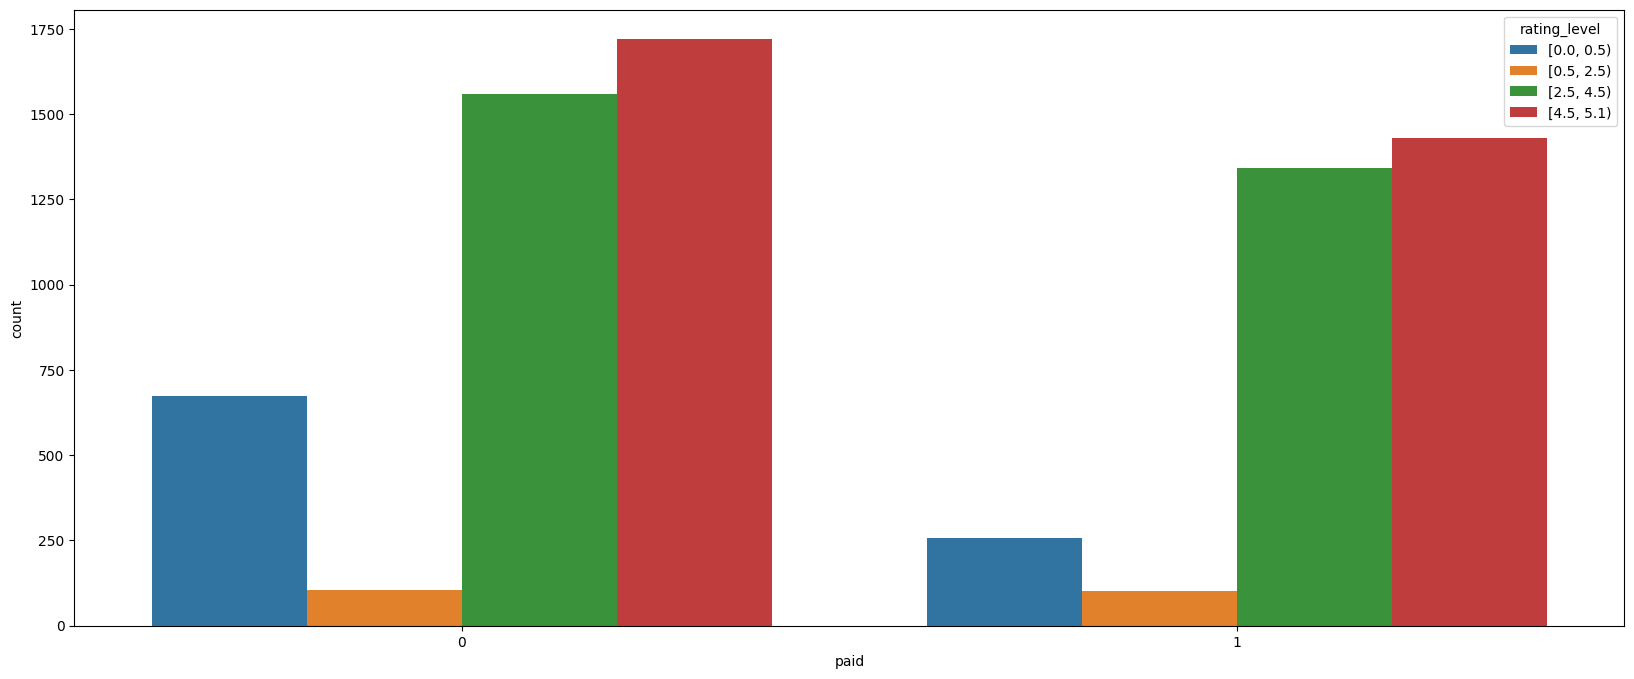

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='paid',data=app,hue='rating_level')

For each category, there are four different colored bars indicating four different user rating levels (blue for [0.0, 0.5], orange for [0.5, 2.5], green for [2.5, 4.5], and red for [4.5, 5]).

For both paid and free apps, the number of apps with ratings between 2.5 and 4.5 is the highest, suggesting that users are relatively satisfied with apps regardless of whether or not they require payment.

The number of free apps with ratings between 4.5 and 5 is significantly higher than that of paid apps, indicating that users are more satisfied with free apps.

In [ ]:
app[['user_rating','price','size_mb']].corr()

,user_rating,price,size_mb
user_rating,1.000000,0.073716,0.066134
price,0.073716,1.000000,0.321719
size_mb,0.066134,0.321719,1.000000


<Axes: >

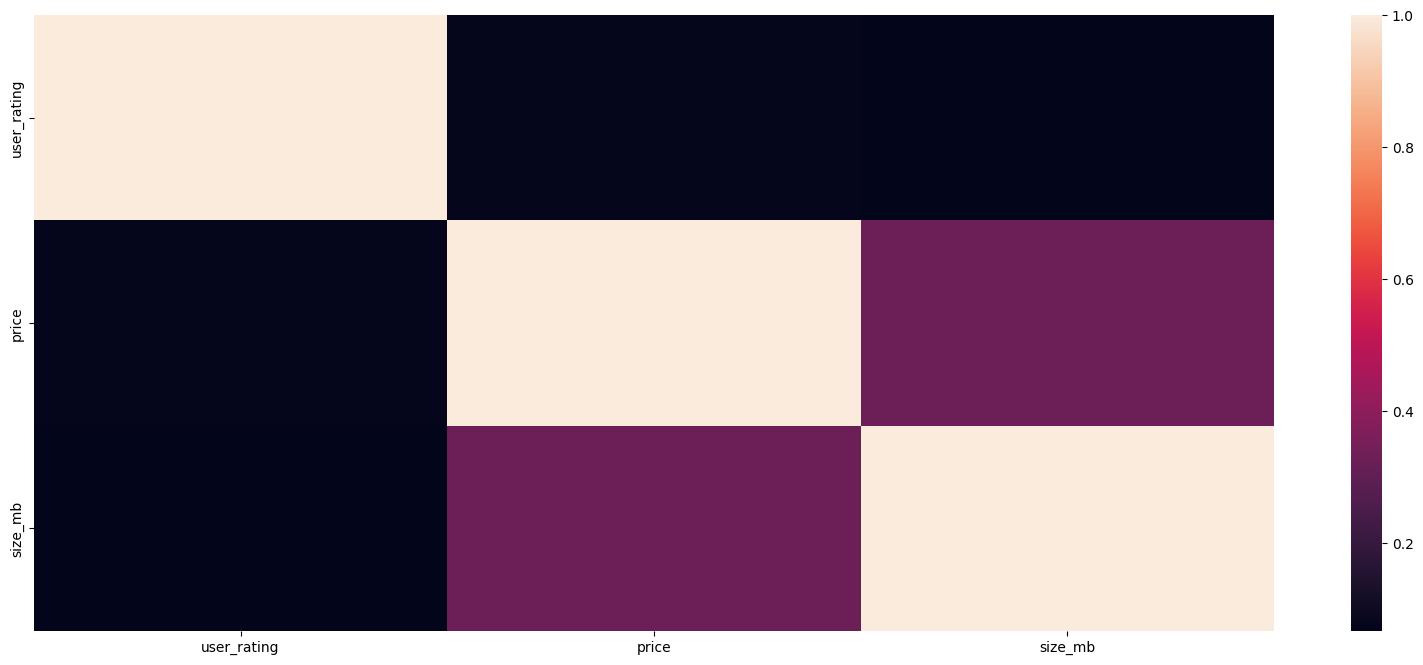

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(app[['user_rating','price','size_mb']].corr())

As you can see from the graph above, there is a negative correlation between user ratings and price and software size, as well as a negative correlation between price and file size.

#**Recommendations and conclusions**

Based on the above data and charts, the following suggestions and summaries can be drawn:

1. The price of the apps is related to the category: games apps have a wider distribution of prices, both free and those that require payment. And the median price of medical apps is higher, indicating that apps in this category usually require payment. Therefore, developers can refer to the price distribution of apps in the same category when pricing their apps.

2. User ratings are related to price and file size: User ratings are negatively correlated with price and file size, indicating that apps with higher prices or larger file sizes may get lower user ratings. When designing apps, developers should try to optimize the performance of the apps, reduce the file size and price them reasonably in order to improve user ratings.

3. Free apps have higher user ratings: Whether paid or free, the number of apps with ratings between 2.5 and 4.5 is the highest. However, the number of free apps with ratings of 4.5 to 5 is significantly higher than paid apps, indicating that users are more satisfied with free apps. Developers may consider monetizing through advertisements and other means instead of charging directly.

4. The number of game apps is the highest: whether paid or free apps, the number of game apps is the highest. This may game apps have a higher market demand. Developers may consider developing more game apps to meet the market demand.